<a href="https://colab.research.google.com/github/Lipolly/reconhecimentoPadroes/blob/main/Exemplo_PreProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doc para a lista 1 :
# https://docs.google.com/document/d/1s7me7aLecUCrMtEBAU0flDs7HP3ts-AjcJnEkO9_GRY/edit?usp=sharing

In [ ]:
## Importando as Bibliotecas Necessárias ##
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from copy import copy
from numpy.linalg import inv
sns.set()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo a base de dados
df = pd.read_excel("/content/drive/Shareddrives/Ufla/Lista1Reconhecimento/hcv_data.xlsx")
dfOrigin = copy(df)
df.head()

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Nessa etapa, vamos codificar as variáveis que precisam de codificação e transformação em variáveis indicadoras

A Base de dados é referente a um banco de sangue. Nela podemos notar informações relevantes para definirmos qual o destino podemos alocar para cada amostra. De acordo com os atributos podemos montar um algoritmo de decisão para atribuirmos a melhor amostra de sangue para um paciente.

In [ ]:
df.shape

(615, 14)

In [ ]:
df.columns

Index(['ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
       'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

Podemos notar que existem 615 amostras e 13 atributos

In [ ]:
df.isna().sum()

Sim, a base de dados possui tanto dados faltantes quanto NANs. Dados com outliers [ALB, ALP, ALT, CHOL, PROT]

In [ ]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
df_tempvar = df
del df_tempvar["ID"]
var_num = df_tempvar.columns
del df_tempvar["Category"]
var_num2 = df_tempvar.columns
var_num2

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')

In [ ]:
df['Age'].unique()

In [ ]:
df['Sex'].unique()

In [ ]:
## Codificando dependentes - Transformação e variáveis indicadoras binárias
df = dfOrigin
k = np.where(df["Category"] == '0=Blood Donor')[0]
df["Category"][k] = 1
del k

k = np.where(df["Category"] == '0s=suspect Blood Donor')[0]
df['Category'][k] = 1
del k

k = np.where(df["Category"] =='1=Hepatitis')[0]
df['Category'][k] = -1
del k

k = np.where(df["Category"] == '2=Fibrosis')[0]
df['Category'][k] = 0
del k

k = np.where(df["Category"] == '3=Cirrhosis')[0]
df['Category'][k] = 0
del k

k = np.where(df["Category"] == '?')[0]
df.iloc[k] = np.nan
del k

## Codficando Area da propriedade - Transformação e variáveis indicadoras binárias

k = np.where(df["Age"] > 20)[0]
df["Age"][k] = 1
del k
##

#Codificando variáveis binárias para (0/1)
df["Sex"][df["Sex"] == 'm'] = 0
df["Sex"][df["Sex"] == 'f'] = 1

df.head()

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1.0,1,1.0,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2.0,1,1.0,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3.0,1,1.0,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4.0,1,1.0,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5.0,1,1.0,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df_null = df.isnull().unstack()
t = df_null[df_null]
t

In [ ]:
#Imputação da Média
df_temp = df.drop(603)
k = df_temp['ALB'].sum()/df_temp.shape[0]
df['ALB'][603] = k

df_temp = df
ALP = [541,545,546,568,569,570,571,576,581,582,583,584,585,590,592,603,613,614]
for i in ALP:
  df_temp = df.drop(i)

k = df_temp['ALP'].sum()/df_temp.shape[0]
for i in ALP:
  df['ALP'][i] = k


df_temp = df
df_temp = df.drop(540)
k = df_temp['ALT'].sum()/df_temp.shape[0]
df['ALT'][540] = k

df_temp = df
CHOL = [121,319,329,413,424,433,498,584,590,603]
for i in CHOL:
  df_temp = df.drop(i)

k = df_temp['CHOL'].sum()/df_temp.shape[0]
for i in CHOL:
  df['CHOL'][i] = k


df_temp = df
df_temp = df.drop(590)
k = df_temp['PROT'].sum()/df_temp.shape[0]
df['PROT'][590] = k

df_media = df
df_media.isnull().sum()

print(df)

      ID       Category  Age Sex   ALB         ALP    ALT    AST   BIL    CHE  \
0      1  0=Blood Donor   32   m  38.5   52.500000    7.7   22.1   7.5   6.93   
1      2  0=Blood Donor   32   m  38.5   70.300000   18.0   24.7   3.9  11.17   
2      3  0=Blood Donor   32   m  46.9   74.700000   36.2   52.6   6.1   8.84   
3      4  0=Blood Donor   32   m  43.2   52.000000   30.6   22.6  18.9   7.33   
4      5  0=Blood Donor   32   m  39.2   74.100000   32.6   24.8   9.6   9.15   
..   ...            ...  ...  ..   ...         ...    ...    ...   ...    ...   
610  611    3=Cirrhosis   62   f  32.0  416.600000    5.9  110.3  50.0   5.57   
611  612    3=Cirrhosis   64   f  24.0  102.800000    2.9   44.4  20.0   1.54   
612  613    3=Cirrhosis   64   f  29.0   87.300000    3.5   99.0  48.0   1.66   
613  614    3=Cirrhosis   46   f  33.0   66.393322   39.0   62.0  20.0   3.56   
614  615    3=Cirrhosis   59   f  36.0   66.393322  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PR

In [ ]:
#Imputação da Mediana
df = dfOrigin
df_temp = df.drop(603)
index_mediana = df_temp.shape[0]//2
df_temp2 = df_temp.sort_values(by=["ALB"], ignore_index=True)
k = df_temp2['ALB'][index_mediana]
df['ALB'][603] = k

df_temp = df
ALP = [541,545,546,568,569,570,571,576,581,582,583,584,585,590,592,603,613,614]
for i in ALP:
  df_temp = df.drop(i)

df_temp2 = df_temp.sort_values(by=["ALP"], ignore_index=True)
k = df_temp2['ALP'][index_mediana]

for i in ALP:
  df['ALP'][i] = k

df_temp = df.drop(540)
df_temp2 = df_temp.sort_values(by=["ALT"], ignore_index=True)
k = df_temp2['ALT'][index_mediana]
df['ALT'][540] = k

df_temp = df
CHOL = [121,319,329,413,424,433,498,584,590,603]
for i in CHOL:
  df_temp = df.drop(i)

df_temp2 = df_temp.sort_values(by=["CHOL"], ignore_index=True)
k = df_temp2['CHOL'][index_mediana]

for i in CHOL:
  df['CHOL'][i] = k

df_temp = df.drop(590)
df_temp2 = df_temp.sort_values(by=["PROT"], ignore_index=True)
k = df_temp2['PROT'][index_mediana]
df['PROT'][590] = k

df_mediana = df
df_mediana.isnull().sum()

ID          0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [ ]:
dfOrigin.head()

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1.0,1,1.0,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2.0,1,1.0,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3.0,1,1.0,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4.0,1,1.0,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5.0,1,1.0,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#Imputação do KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed_data = imputer.fit_transform(df)  # impute all the missing data
df_KNN= pd.DataFrame(imputed_data)
df_KNN.rename(columns = {0: "Id", 1: "Category", 2: "Age", 3: "Sex", 4: "ALB", 5: "ALP", 6: "ALT", 7: "AST", 8: "BIL" , 9: "CHE" , 10: "CHOL", 11: "CREA", 12: "GGT", 13: "PROT" }, inplace=True)
df_KNN

NameError: ignored

In [ ]:
df_KNN.isnull().sum()

NameError: ignored

In [ ]:
#aplicando histogramas para os atributos contínuos:
def multigraficos_histograma(data, nrows, ncols, nomes):
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.histplot(ax = axs[i,j], data = data, x = nomes[k])
            axs[i, j].set_xlabel(nomes[k])
            axs[i, j].set_ylabel("contagem")
            k+=1
        #
    #
#

nrows = 3
ncols = 5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Carregar o dataset
data = dfOrigin


X = np.array([df.Sex.iloc[346],df.ALP.iloc[346],df.CREA.loc[346])
y = np.array(0,1)
# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(x, y)

# Fazer previsões
preds = gnb.predict(df.loc[400,"ALP"])
print(preds)

# Avaliar a precisão
print(accuracy_score(model, preds))

TypeError: ignored

HIstograma Média


IndexError: ignored

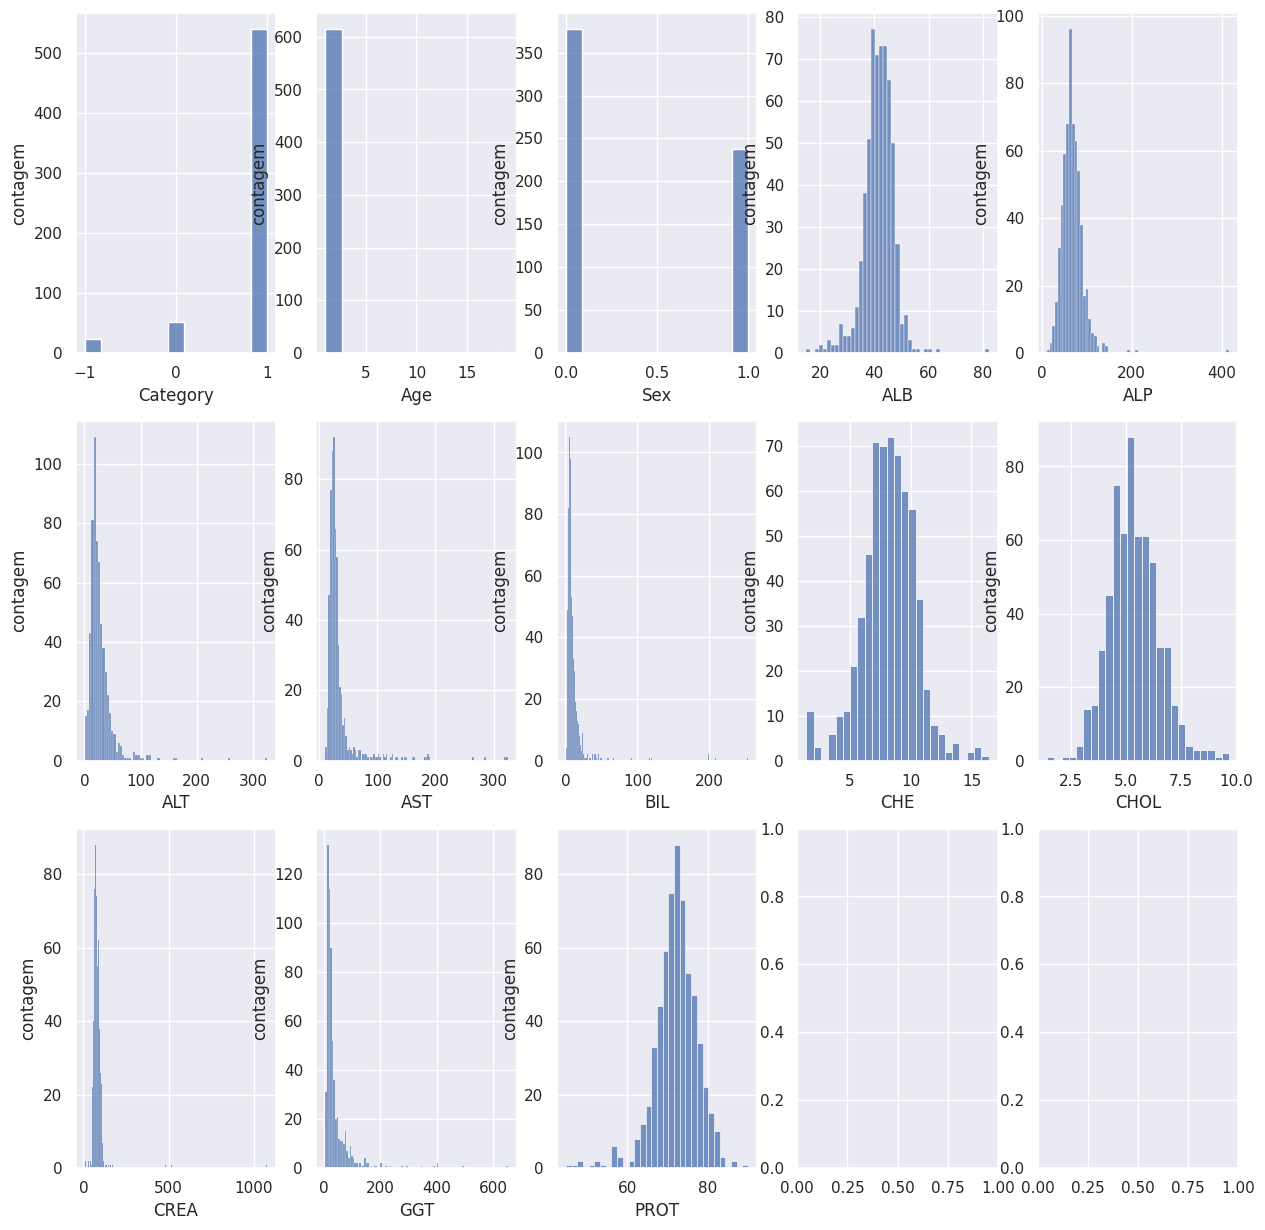

In [ ]:
#Histograma Média
multigraficos_histograma(df_media, nrows, ncols, var_num)

Histograma para a Mediana


IndexError: ignored

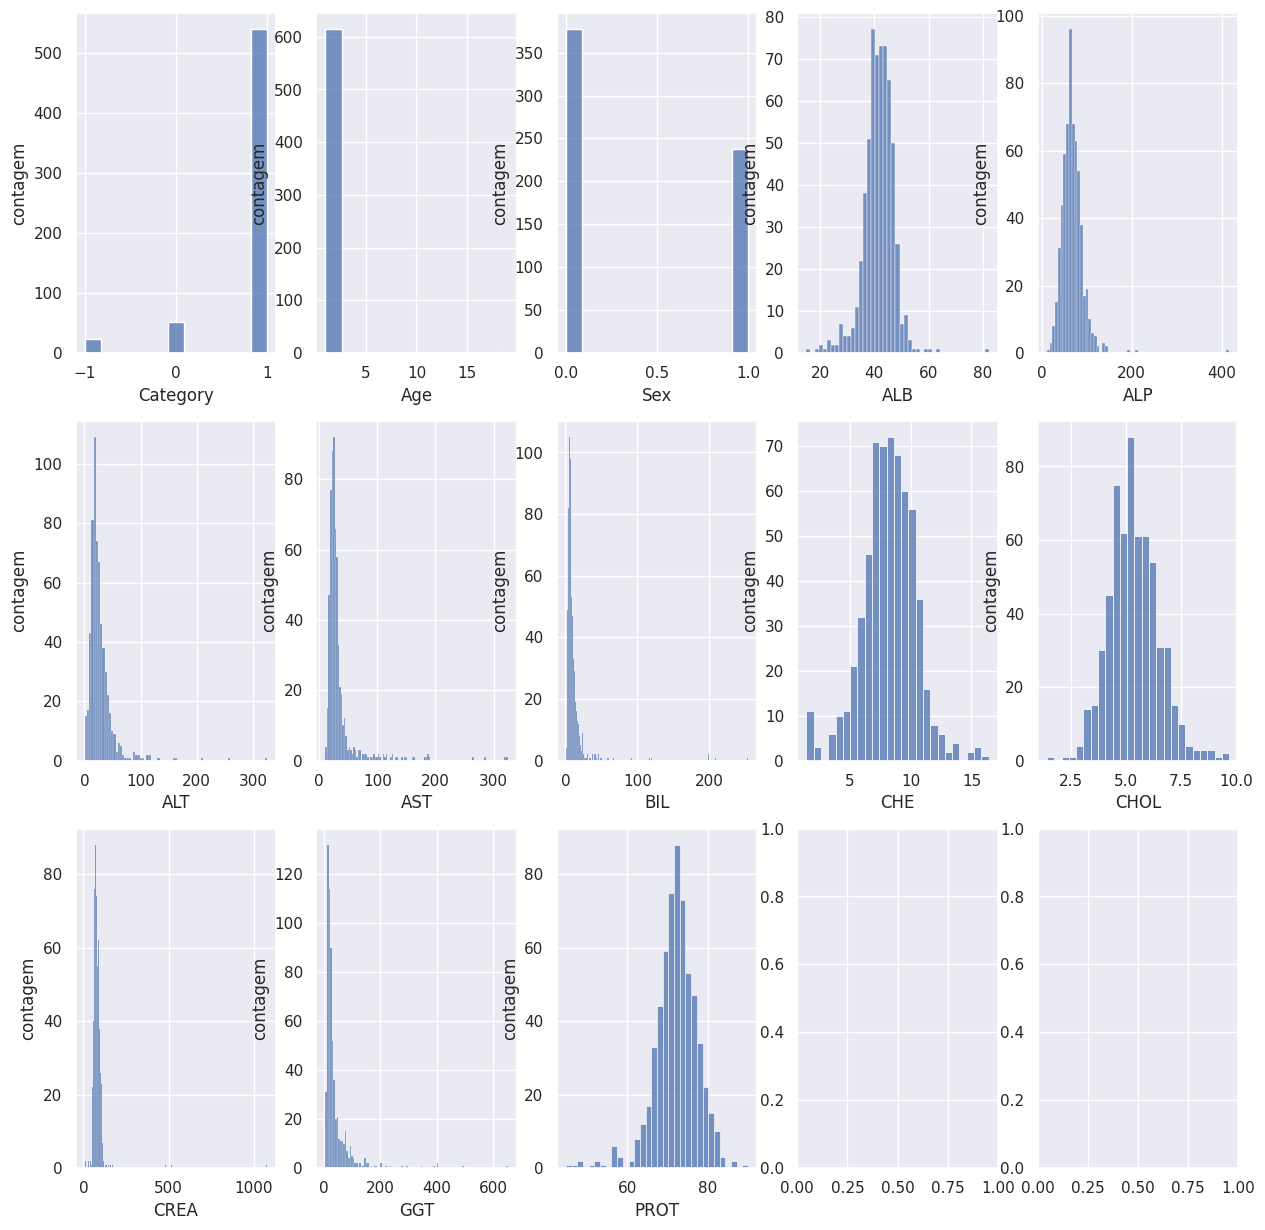

In [ ]:
multigraficos_histograma(df_mediana, nrows, ncols, var_num)

Histograma KNN

IndexError: ignored

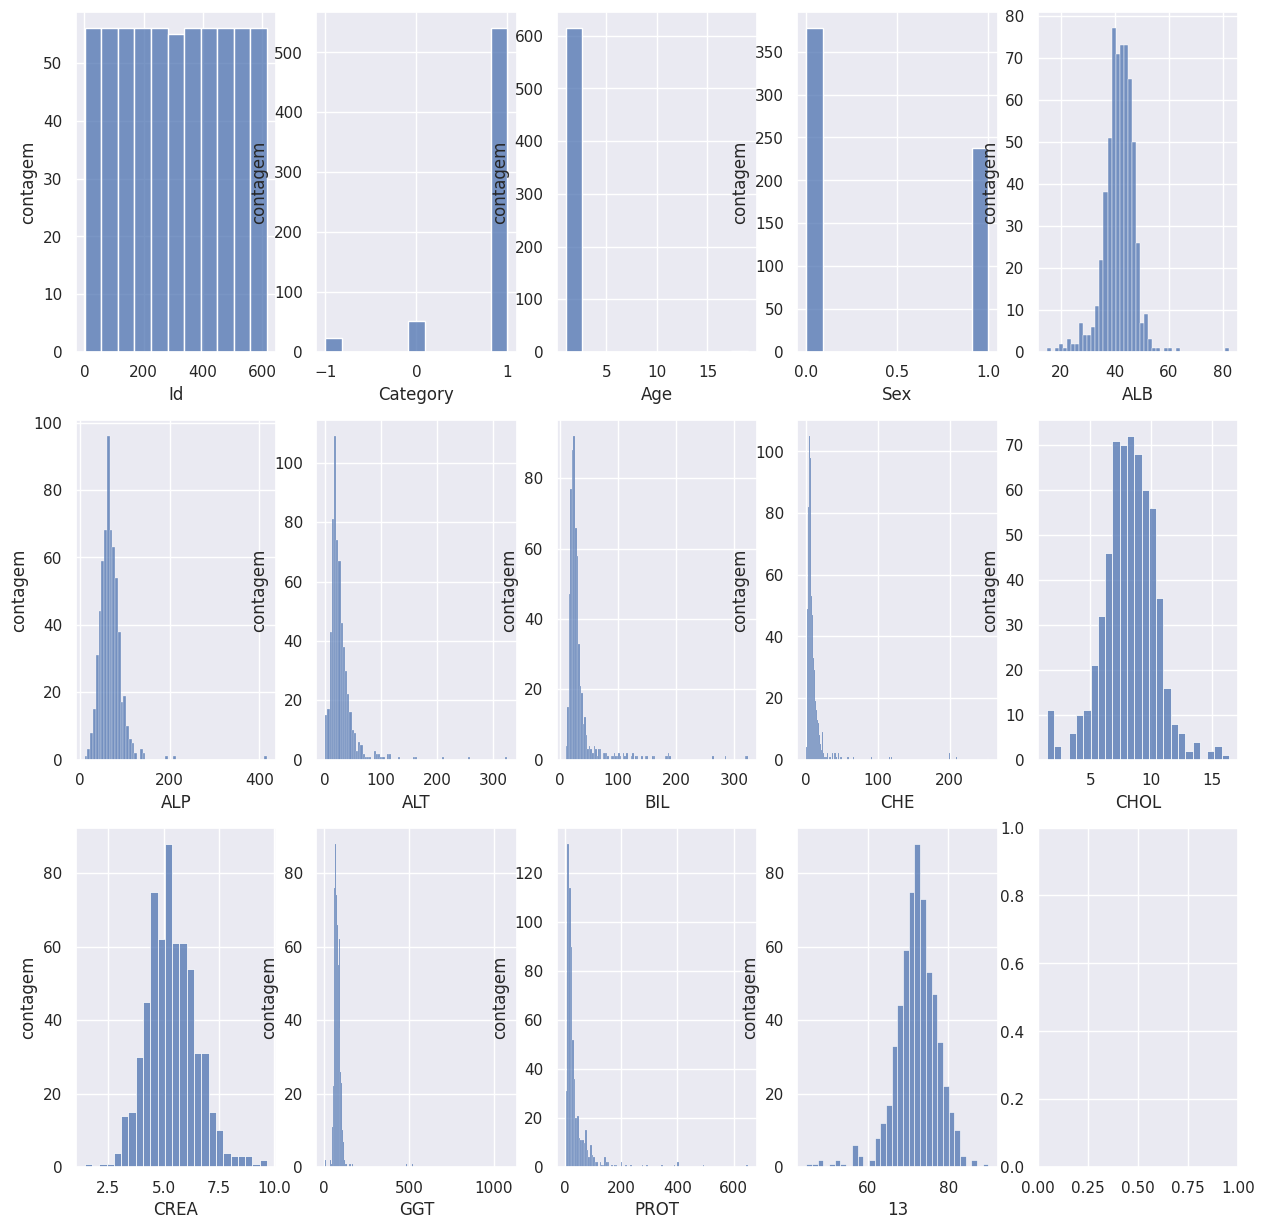

In [ ]:
#df_KNN
var_numKNN = df_KNN.columns
multigraficos_histograma(df_KNN, nrows, ncols, var_numKNN)

Variaveis com outliers: 
Age
ALB
ALP
ALT
AST
BIL
CHE
CHOL
CREA
GGT
PROT

 A observação também poderá ser feita de forma visual, mediante os gráficos de boxplot


Text(0.5, 0, 'PROT')

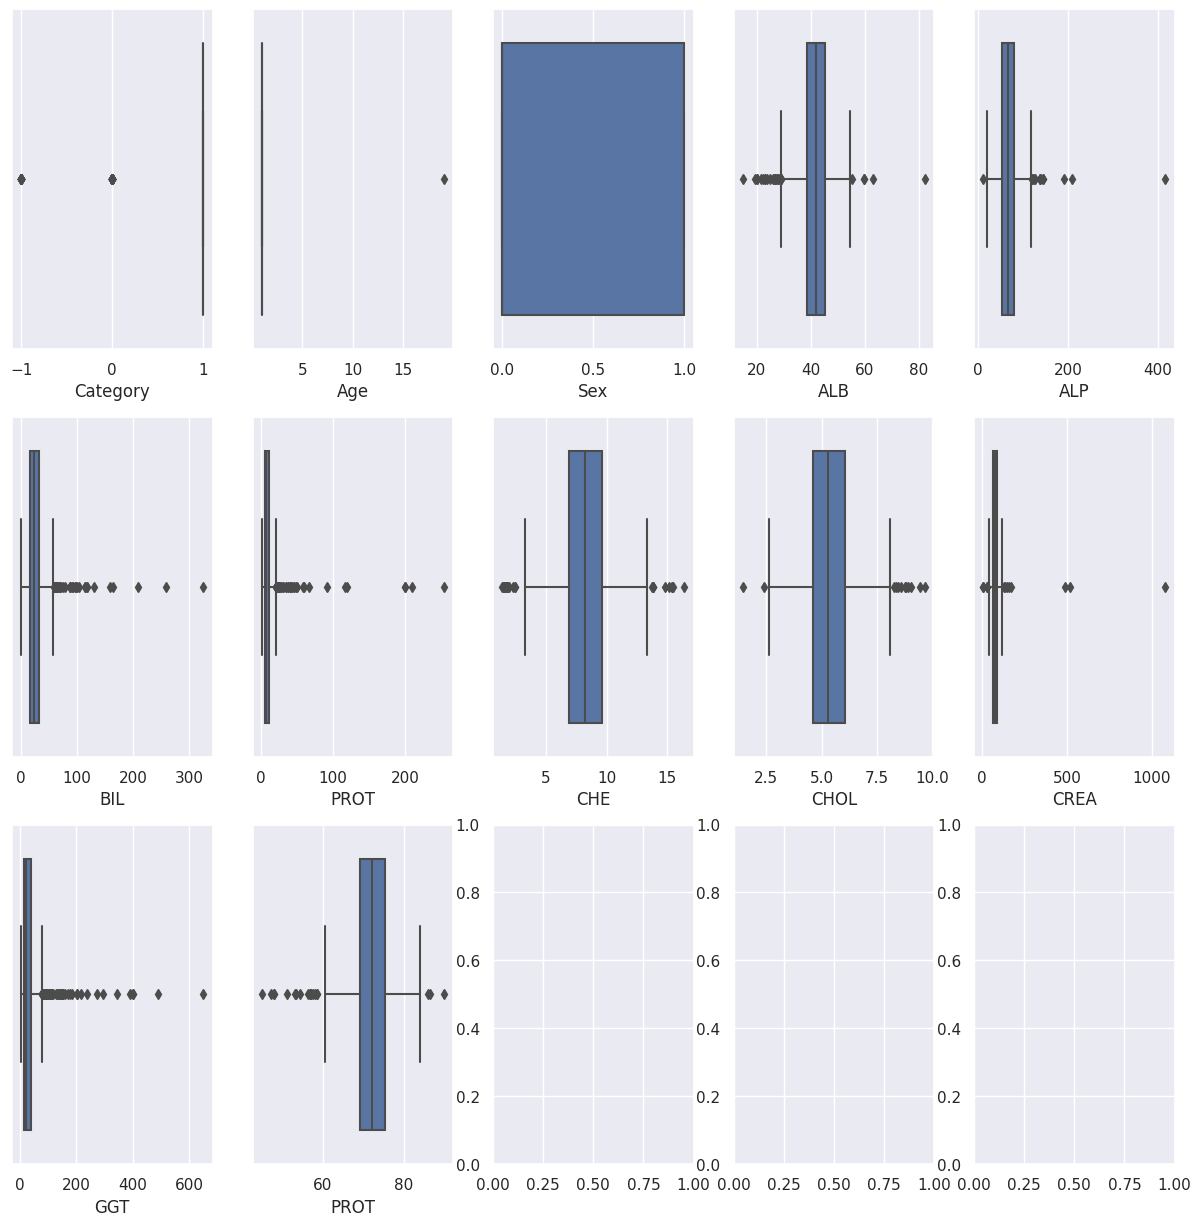

In [ ]:
print("Variaveis com outliers: ")
df = dfOrigin

dsc = df[var_num].describe() #obtendo estatísticas descritivas dos atributos numericos

for name in dsc.columns:
    q1 = dsc[name]["25%"]
    q3 = dsc[name]["75%"]
    iqr = q3-q1

    min_ = q1 - 1.5*iqr
    max_ = q3 + 1.5*iqr

    out_inf = np.where(df[name] < min_)[0]
    out_sup = np.where(df[name] > max_)[0]

    if ((out_inf.shape[0] > 0) or (out_sup.shape[0] > 0)):
        print(name)
    #
#

print("\n A observação também poderá ser feita de forma visual, mediante os gráficos de boxplot")

# # funcao para multiplos boxplot
# def multigraficos_boxplot(data, nrows, ncols, nomes):
#     fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
#     k = 0
#     for i in range(nrows):
#         for j in range(ncols):
#             axs[i, j].boxplot(data = data, x = nomes[k])
#             axs[i, j].set_xlabel(nomes[k])
#             k+=1
#         #
#     #
# #

# nrows = 1
# ncols = 2
# multigraficos_boxplot(df, nrows, ncols, var_num[0:2])


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
sns.boxplot(ax = axs[0,0], data = df, x = 'Category', orient = 'h');  axs[0, 0].set_xlabel('Category')
sns.boxplot(ax = axs[0,1], data = df, x = 'Age', orient = 'h'); axs[0, 1].set_xlabel("Age")
sns.boxplot(ax = axs[0,2], data = df, x =  'Sex', orient = 'h'); axs[1, 0].set_xlabel( "Sex")
sns.boxplot(ax = axs[0,3], data = df, x = 'ALB', orient = 'h'); axs[1, 1].set_xlabel("ALB")
sns.boxplot(ax = axs[0,4], data = df, x =  'ALP', orient = 'h'); axs[1, 0].set_xlabel( "ALP")
sns.boxplot(ax = axs[1,0], data = df, x = "ALT", orient = 'h'); axs[1, 1].set_xlabel("ALT")
sns.boxplot(ax = axs[1,1], data = df, x =  "BIL", orient = 'h'); axs[1, 0].set_xlabel( "BIL")
sns.boxplot(ax = axs[1,2], data = df, x = "CHE", orient = 'h'); axs[1, 1].set_xlabel("CHE")
sns.boxplot(ax = axs[1,3], data = df, x = "CHOL", orient = 'h'); axs[1, 1].set_xlabel("CHOL")
sns.boxplot(ax = axs[1,4], data = df, x = "CREA", orient = 'h'); axs[1, 1].set_xlabel("CREA")
sns.boxplot(ax = axs[2,0], data = df, x = "GGT", orient = 'h'); axs[1, 1].set_xlabel("GGT")
sns.boxplot(ax = axs[2,1], data = df, x = "PROT", orient = 'h'); axs[1, 1].set_xlabel("PROT")

In [ ]:
#plot dos gráficos de barras a partir da base antiga (xraw)
#com a base antiga, podemos observar os valores originais e visualizar melhor onde contém os valores ausentes (?)
def multigraficos_histograma_classe(data, nrows, ncols, nomes, nome_saida):
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.histplot(ax = axs[i,j], data = data, x = nomes[k], hue = nome_saida)
            axs[i, j].set_xlabel(nomes[k])
            axs[i, j].set_ylabel("contagem")
            k+=1
        #
    #
#

nrows = 4
ncols = 2
nomes = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
nome_saida = 'Loan_Status'
xraw['Dependents'] = xraw['Dependents'].astype(str) #ajuste para todos os campos de 'Dependents' serem do mesmo tipo
xraw['Credit_History'] = xraw['Credit_History'].astype(str)

multigraficos_histograma_classe(xraw, nrows, ncols, nomes, nome_saida)


In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
#plotando graficos de dispersão
sns.scatterplot(ax = axs[0,0], data = df, x = "ApplicantIncome", y= "LoanAmount")
#plotando graficos de dispersão com divisão entre as classes
sns.scatterplot(ax = axs[0,1], data = df, x = "ApplicantIncome", y= "LoanAmount", hue = "Loan_Status")

#plotando graficos de dispersão
sns.scatterplot(ax = axs[1,0], data = df, x = "ApplicantIncome", y= "CoapplicantIncome")
#plotando graficos de dispersão com divisão entre as classes
sns.scatterplot(ax = axs[1,1], data = df, x = "ApplicantIncome", y= "CoapplicantIncome", hue = "Loan_Status")

In [ ]:
#resolvendo problema de Loan Status como texto para numerico e passando a variável de saída para o final do data frame
status = df["Loan_Status"].astype(float)
df = df.drop(["Loan_Status"], axis = 1)
df["Loan_Status"] = status

#plotando matriz de correlação
fig, ax = plt.subplots(dpi=120)
sns.heatmap(df.corr(), cmap='viridis')

## Limpeza de dados:
Nesta etapa se faz a limpeza dos dados, dos outliers e valores ausentes, os valores serão substituídos pela média dos atributos, mas podem investigar outras formas de inputação

In [ ]:
#verificando quais atributos possuem valores ausentes
np.sum(df.isnull())

as variáveis numéricas receberão os valores médios dos respectivos atributos, as variáveis categóricas receberão o valor -1

variáveis numéricas com valores ausentes:
- LoanAmount
- Loan_Amount_Term

variáveis categóricas (binárias) com valores ausentes:
- Gender  
- Married
- Self_Employed        
- Credit_History       
- 0_Dependents         
- 1_Dependents         
- 2_Dependents     
- 3+_Dependents        

In [ ]:
#convertendo Education para numérica no data frame
df['Education'] = df['Education'].astype(float)

# começando pelas variáveis numéricas
var_num = ['LoanAmount', 'Loan_Amount_Term']

for nome in var_num:
    indices = df.loc[pd.isna(df[nome]), :].index
    df[nome][indices] = df[nome].mean()
#

# fazendo o mesmo procedimento para variáveis categóricas
var_cat = ['Gender', 'Married', 'Self_Employed', 'Credit_History', '0_Dependents', '1_Dependents',
           '2_Dependents', '3+_Dependents']

for nome in var_cat:
    indices = df.loc[pd.isna(df[nome]), :].index
    df[nome][indices] = -1
#


Conforme as variáveis numéricas possuem elevada assimetria, no geral, será aplicada a transformação em log.

In [ ]:
#Variáveis numéricas contínuas:
var_num = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#log(var + 1) o +1 foi incluído para evitar valor igual a zero: log(0) = -inf
for nome in var_num:
    df[nome] = np.log10(df[nome] + 1)
#

nrows = 2
ncols = 2
multigraficos_histograma(df, nrows, ncols, var_num)



In [ ]:
nrows = 2
ncols = 2
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
sns.boxplot(ax = axs[0,0], data = df, x = 'ApplicantIncome', orient = 'h');  axs[0, 0].set_xlabel('ApplicantIncome')
sns.boxplot(ax = axs[0,1], data = df, x = 'CoapplicantIncome', orient = 'h'); axs[0, 1].set_xlabel('CoapplicantIncome')
sns.boxplot(ax = axs[1,0], data = x_loanAmount, x = 'LoanAmount', orient = 'h'); axs[1, 0].set_xlabel('LoanAmount')
sns.boxplot(ax = axs[1,1], data = x_AmountTerm, x = 'Loan_Amount_Term', orient = 'h'); axs[1, 1].set_xlabel('Loan_Amount_Term')

Seleção de atributos:
Para realizar o processo será aplicado o Discriminante de Fisher e plotados os valores dos obtidos

In [ ]:
##FDR

#transformando o data frame para numpy array:
#Separando os vetores de cada classe
c0 = df[df['Loan_Status'] == 0].values[:,0:-1] #remove o atributo de classe
c1 = df[df['Loan_Status'] == 1].values[:,0:-1]


#Calculando índice J:
J = (np.mean(c0, axis = 0) - np.mean(c1, axis = 0)) * (1/(np.var(c0, axis = 0) + np.var(c1, axis = 0)))
plt.plot(J, '.-')

indices = np.argsort(J)
print('Ordenação de importância pelo FDR - Do menos ao mais importante')
print(df.columns[indices])





In [ ]:
#Questão 3:
dfOrigin = df
values = ['0s=suspect Blood Donor', '2=Fibrosis', '3=Cirrhosis']
df_Exec3 = dfOrigin[df['Category'].isin(values) == False]

blood = df_Exec3[df_Exec3['Category'] == '0=Blood Donor'].iloc[:24]
hepatit = df_Exec3[df_Exec3['Category'] == '1=Hepatitis'].iloc[:24]

df_Exec3 = pd.concat([blood, hepatit])

In [ ]:
#Questão 3:
df_Exec3['Category'] = df_Exec3['Category'].map({'0=Blood Donor': 1, '1=Hepatitis': -1})

df_Exec3['CHOL'] = np.log1p(df_Exec3['CHOL'])
df_Exec3['CHE'] = np.log1p(df_Exec3['CHE'])

X = df_Exec3[['CHOL', 'CHE']].values
y = df_Exec3['Category'].values

X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

w = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))
print(w)

w1, w2, w0 = w[0], w[1], w[2]

x_hyperplane = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
y_hyperplane = (-w0 - w1 * x_hyperplane) / w2

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Blood Donor', c='blue')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Hepatitis', c='red')
plt.plot(x_hyperplane, y_hyperplane, color='green', label='Hiperplano de Separação')
plt.xlabel('CHOL')
plt.ylabel('CHE')
plt.legend()
plt.title('Gráfico de Dispersão com Classificador Linear e Reta de Separação')
plt.grid(True)
plt.show()

# **Questão 4:**

**Probabilidade priori**

P(C1) = 1000 / 2500 = 0.4

P(C2) = 1970 / 2500 = 0.788

P(C3) = 685 / 2500 = 0.274

P(C1^) = 1345 / 2500 = 0.538

P(C2^) = 1970 / 2500 = 0.788

P(C3^) = 685 / 2500 = 0.274


**Precisão e recall para cada classe:**

Classe C1:
Precisão (C1) = 900 / (900 + 105 + 340) = 0.717
Recall (C1) = 900 / (900 + 10 + 90) = 0.9

Classe C2:
Precisão (C2) = 1700 / (1700 + 10 + 260) = 0.856
Recall (C2) = 1700 / (1700 + 105 + 195) = 0.887

Classe C3:
Precisão (C3) = 400 / (400 + 90 + 195) = 0.571
Recall (C3) = 400 / (400 + 340 + 260) = 0.446

**Acurácia e kappa:**

Acurácia = (900 + 1700 + 400) / (2500) = 0.792
P_e = (0.4 * 0.538) + (0.788 * 0.788) + (0.274 * 0.274) = 0.514
Kappa = (0.792 - 0.514) / (1 - 0.514) = 0.554


*Com base nos valores calculados, o desempenho do modelo não é satisfatório, pois nenhum dos índices de avaliação está acima de 80%.*